## Experimental Summary

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from visualization import *

In [2]:
EXPERIMENT = 'final'

# map the experiment names to the paper baseline names
keys = {
    
    'meta-xgb_single-xgb_t': 'T-Learner',
    'meta-xgb_single-xgb_x': 'X-Learner',
    'meta-xgb_single-xgb_r': 'R-Learner',
    'meta-xgb_single-xgb_dr': 'DR-Learner',
    'dr-dr-dr': 'DragonNet',
    'dr-dcn-dcn': 'DESCN',
    'crf-crf-crf': 'CausalForest',
    'pb-pb-pb_lc_f_t0': 'GBDT Outcome',
    'pb-pb-pb_lc_f_t1': 'GBDT Uplift',
    'pb-pb-pb_lc_f_t0.5': 'GBDT Average'
    
}

In [3]:
# get results for baselines
baselines = get_baselines_results(
    experiment=EXPERIMENT, # experiment name
    datasets=['synth1', 'hillstrom', 'criteo', 'megafon', 'lenta'],
    models=[
        'meta-xgb_single-xgb_dr',
        'meta-xgb_single-xgb_r',
        'meta-xgb_single-xgb_x',
        'meta-xgb_single-xgb_t',
        'crf-crf-crf',
        'dr-dr-dr',
        'dr-dcn-dcn'
    ]
)

pb_based = get_pb_results(
    experiment=EXPERIMENT, # experiment name
    datasets=['synth1', 'hillstrom', 'criteo', 'megafon', 'lenta'],
    weights=[0, 1, 0.5]
)

res = pd.concat(baselines + pb_based)


/home/jovyan/.imgenv-determined-jemison-0/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
res

,AUUC,MSE,treat,data,model,stat
0,0.082235,0.035411,0,synth1,meta-xgb_single-xgb_dr,mean
1,0.161354,0.039993,1,synth1,meta-xgb_single-xgb_dr,mean
2,0.193615,0.044105,2,synth1,meta-xgb_single-xgb_dr,mean
3,0.227645,0.069475,3,synth1,meta-xgb_single-xgb_dr,mean
4,0.263815,0.063341,4,synth1,meta-xgb_single-xgb_dr,mean
...,...,...,...,...,...,...
0,0.000415,NaN,0,lenta,pb-pb-pb_lc_f_t0,std
0,0.016802,NaN,0,lenta,pb-pb-pb_lc_f_t1,mean
0,0.000914,NaN,0,lenta,pb-pb-pb_lc_f_t1,std
0,0.012568,NaN,0,lenta,pb-pb-pb_lc_f_t0.5,mean


In [5]:
total_auuc = get_datasets_summary(
    res, 'AUUC', mapping=keys
)

### Synthetic datasets AUUC

In [6]:
total_auuc.loc[:, 'synth1']

treat,0,1,2,3,4,5
model,,,,,,
T-Learner,0.078±0.0033,0.172±0.0018,0.198±0.0024,0.242±0.0029,0.274±0.0012,0.296±0.002
X-Learner,0.091±0.0019,0.165±0.0018,0.196±0.0016,0.233±0.0018,0.266±0.0007,0.291±0.0006
R-Learner,0.084±0.0028,0.165±0.0038,0.191±0.0014,0.23±0.0015,0.266±0.0025,0.288±0.002
DR-Learner,0.082±0.0034,0.161±0.0013,0.194±0.0011,0.228±0.0013,0.264±0.0016,0.285±0.0016
DragonNet,0.054±0.0032,0.158±0.0025,0.178±0.005,0.2±0.0056,0.251±0.0053,0.266±0.0138
DESCN,0.064±0.0046,0.165±0.0035,0.184±0.0046,0.222±0.0017,0.257±0.0028,0.284±0.0028
CausalForest,0.055±0.0037,0.163±0.0011,0.188±0.0009,0.214±0.0016,0.242±0.002,0.243±0.0015
GBDT Outcome,0.085±0.0025,0.172±0.0037,0.197±0.0024,0.237±0.0013,0.272±0.0013,0.297±0.0018
GBDT Uplift,0.088±0.0021,0.166±0.0021,0.192±0.0015,0.227±0.001,0.264±0.0011,0.288±0.0011


### Real AUUC datasets

In [7]:
total_auuc.loc[:, ['criteo', 'lenta', 'megafon',  'hillstrom', ]]

data                 criteo          lenta       megafon     hillstrom  \
treat                     0              0             0             0   
model                                                                    
T-Learner      0.045±0.0003   0.005±0.0005  0.166±0.0002  0.002±0.0009   
X-Learner      0.051±0.0004   0.003±0.0033  0.164±0.0002    0.0±0.0009   
R-Learner      0.053±0.0002   0.003±0.0005  0.162±0.0001  0.004±0.0015   
DR-Learner     0.053±0.0003    0.003±0.001   0.16±0.0002  0.002±0.0017   
DragonNet       0.039±0.003   0.006±0.0034  0.181±0.0003  0.008±0.0016   
DESCN         -0.014±0.0061  -0.007±0.0001  0.172±0.0004  0.013±0.0009   
CausalForest   0.048±0.0004   0.002±0.0008  0.152±0.0006  0.007±0.0012   
GBDT Outcome   0.049±0.0002   0.005±0.0004  0.168±0.0002  0.011±0.0012   
GBDT Uplift    0.041±0.0003   0.017±0.0009  0.164±0.0002  0.001±0.0013   
GBDT Average   0.045±0.0004   0.013±0.0008  0.168±0.0001   0.01±0.0012   

data                        
treat                    1  
model                       
T-Learner      0.024±0.002  
X-Learner     0.022±0.0009  
R-Learner     0.025±0.0014  
DR-Learner    0.024±0.0006  
DragonNet     0.024±0.0015  
DESCN         0.024±0.0032  
CausalForest  0.026±0.0013  
GBDT Outcome  0.028±0.0017  
GBDT Uplift   0.003±0.0012  
GBDT Average  0.028±0.0015

### Synthetic MSE datasets

In [8]:
total_mse = get_datasets_summary(
    res, 'MSE', mapping=keys
).loc[:, 'synth1']
total_mse

treat,0,1,2,3,4,5
model,,,,,,
T-Learner,0.034±0.003,0.032±0.0028,0.032±0.0025,0.055±0.0035,0.04±0.0025,0.047±0.0031
X-Learner,0.032±0.003,0.036±0.003,0.038±0.0029,0.062±0.0036,0.055±0.0028,0.062±0.0034
R-Learner,0.034±0.0031,0.037±0.003,0.042±0.0029,0.065±0.0035,0.058±0.0028,0.065±0.0033
DR-Learner,0.035±0.0033,0.04±0.0031,0.044±0.0029,0.069±0.0034,0.063±0.0031,0.071±0.0034
DragonNet,0.039±0.0037,0.032±0.003,0.063±0.0035,0.064±0.0043,0.041±0.0033,0.073±0.0037
DESCN,0.045±0.0038,0.035±0.0032,0.038±0.0031,0.068±0.0043,0.051±0.0033,0.062±0.0042
CausalForest,0.05±0.0043,0.059±0.0041,0.079±0.0044,0.106±0.005,0.116±0.0051,0.118±0.005
GBDT Outcome,0.029±0.003,0.029±0.0029,0.031±0.0027,0.055±0.0034,0.042±0.0027,0.049±0.0031
GBDT Uplift,0.031±0.0031,0.036±0.0031,0.04±0.003,0.065±0.0034,0.059±0.0029,0.068±0.0035


### Rank Summary

In [9]:
ranks = get_rank_stats(res, keys)
ranks

,AUUC_rank,MSE_rank,AUUC_from_top,MSE_from_top
model,,,,
T-Learner,4.0,2.3,18.7,4.600000
X-Learner,5.4,4.8,20.8,22.900000
R-Learner,5.5,6.7,18.5,30.000000
DR-Learner,6.3,8.3,20.4,39.700001
DragonNet,7.4,6.2,21.6,37.900002
DESCN,7.0,6.0,31.7,30.200001
CausalForest,7.8,10.0,23.9,127.599998
GBDT Outcome,2.5,1.7,10.3,2.000000
GBDT Uplift,6.1,6.3,21.7,28.299999


### Weights plot

In [10]:
res = get_pb_weighted_results(
    experiment=EXPERIMENT, # experiment name
    dataset='synth1',
)

#### Treatment 0

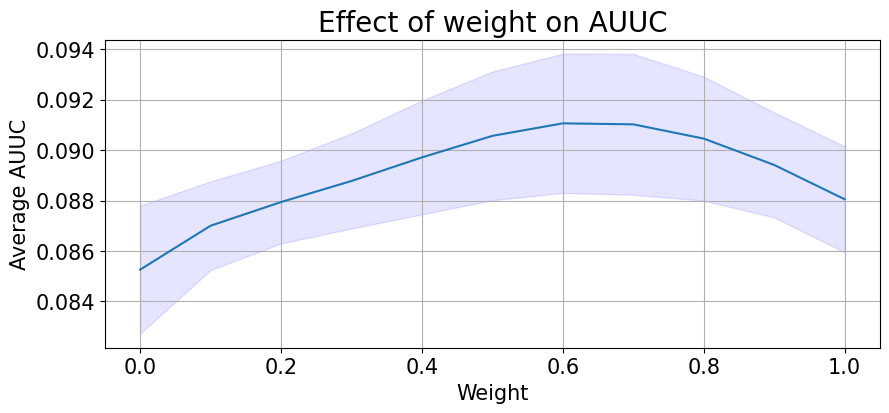

In [11]:
plt.figure(figsize=(10, 4))
plt.title('Effect of weight on AUUC', fontsize=20)
mean = res.query('stat == "mean" & treat == 0').set_index('w')['AUUC']
std = res.query('stat == "std" & treat == 0').set_index('w')['AUUC']
mean.plot()
plt.grid()

plt.xlabel('Weight', fontsize=15)
plt.ylabel('Average AUUC', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.fill_between(np.linspace(0, 1, 11), (mean.values-std.values), (mean.values+std.values), color='b', alpha=.1)
plt.savefig('w_vs_auuc.png', dpi=720, facecolor='white', bbox_inches='tight')

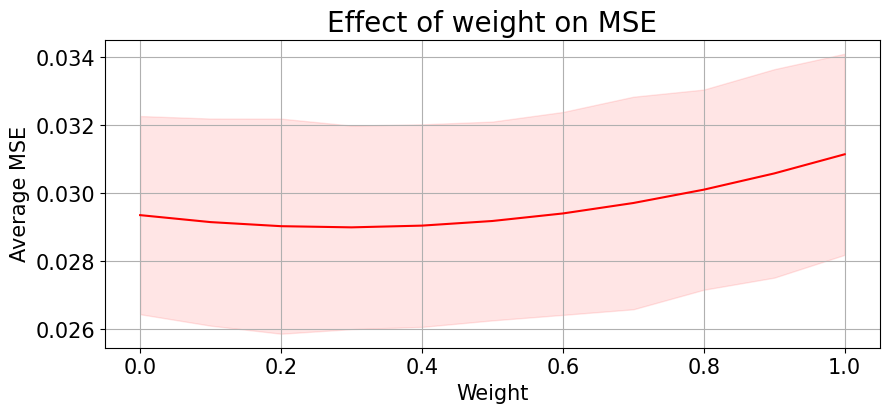

In [12]:
plt.figure(figsize=(10, 4))
plt.title('Effect of weight on MSE', fontsize=20)
mean = res.query('stat == "mean" & treat == 0').set_index('w')['MSE']
std = res.query('stat == "std" & treat == 0').set_index('w')['MSE']
mean.plot(color='r')
plt.grid()

plt.xlabel('Weight', fontsize=15)
plt.ylabel('Average MSE', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.fill_between(np.linspace(0, 1, 11), (mean.values-std.values), (mean.values+std.values), color='r', alpha=.1)
plt.savefig('w_vs_mse.png', dpi=720, facecolor='white', bbox_inches='tight')

### Latex tables

In [18]:
print(
    to_latex(total_auuc.loc[:, 'synth1'], 'max')
)

\textbf{T-Learner} & 0.078±0.0033 & \textbf{0.172±0.0018} & \textbf{0.198±0.0024} & \textbf{0.242±0.0029} & \textbf{0.274±0.0012} & 0.296±0.002 \\ 
\textbf{X-Learner} & \textbf{0.091±0.0019} & 0.165±0.0018 & 0.196±0.0016 & 0.233±0.0018 & 0.266±0.0007 & 0.291±0.0006 \\ 
\textbf{R-Learner} & 0.084±0.0028 & 0.165±0.0038 & 0.191±0.0014 & 0.23±0.0015 & 0.266±0.0025 & 0.288±0.002 \\ 
\textbf{DR-Learner} & 0.082±0.0034 & 0.161±0.0013 & 0.194±0.0011 & 0.228±0.0013 & 0.264±0.0016 & 0.285±0.0016 \\ 
\textbf{DragonNet} & 0.054±0.0032 & 0.158±0.0025 & 0.178±0.005 & 0.2±0.0056 & 0.251±0.0053 & 0.266±0.0138 \\ 
\textbf{DESCN} & 0.064±0.0046 & 0.165±0.0035 & 0.184±0.0046 & 0.222±0.0017 & 0.257±0.0028 & 0.284±0.0028 \\ 
\textbf{CausalForest} & 0.055±0.0037 & 0.163±0.0011 & 0.188±0.0009 & 0.214±0.0016 & 0.242±0.002 & 0.243±0.0015 \\ 
\textbf{GBDT Outcome} & 0.085±0.0025 & \textbf{0.172±0.0037} & 0.197±0.0024 & 0.237±0.0013 & 0.272±0.0013 & \textbf{0.297±0.0018} \\ 
\textbf{GBDT Uplift} & 0.088±0.0021 &

/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:283: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[sl] = "\\textbf{" + df[col].loc[sl].astype(str) + "}"
/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:

In [14]:
print(
    to_latex(total_auuc.loc[:, ['criteo', 'lenta', 'megafon',  'hillstrom', ]], 'max')
)

\textbf{T-Learner} & 0.045±0.0003 & 0.005±0.0005 & 0.166±0.0002 & 0.002±0.0009 & 0.024±0.002 \\ 
\textbf{X-Learner} & 0.051±0.0004 & 0.003±0.0033 & 0.164±0.0002 & 0.0±0.0009 & 0.022±0.0009 \\ 
\textbf{R-Learner} & \textbf{0.053±0.0002} & 0.003±0.0005 & 0.162±0.0001 & 0.004±0.0015 & 0.025±0.0014 \\ 
\textbf{DR-Learner} & \textbf{0.053±0.0003} & 0.003±0.001 & 0.16±0.0002 & 0.002±0.0017 & 0.024±0.0006 \\ 
\textbf{DragonNet} & 0.039±0.003 & 0.006±0.0034 & \textbf{0.181±0.0003} & 0.008±0.0016 & 0.024±0.0015 \\ 
\textbf{DESCN} & -0.014±0.0061 & -0.007±0.0001 & 0.172±0.0004 & \textbf{0.013±0.0009} & 0.024±0.0032 \\ 
\textbf{CausalForest} & 0.048±0.0004 & 0.002±0.0008 & 0.152±0.0006 & 0.007±0.0012 & 0.026±0.0013 \\ 
\textbf{GBDT Outcome} & 0.049±0.0002 & 0.005±0.0004 & 0.168±0.0002 & 0.011±0.0012 & \textbf{0.028±0.0017} \\ 
\textbf{GBDT Uplift} & 0.041±0.0003 & \textbf{0.017±0.0009} & 0.164±0.0002 & 0.001±0.0013 & 0.003±0.0012 \\ 
\textbf{GBDT Average} & 0.045±0.0004 & 0.013±0.0008 & 0.168±0.0

/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:283: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[sl] = "\\textbf{" + df[col].loc[sl].astype(str) + "}"
/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:

In [15]:
print(
    to_latex(total_mse, 'min')
)

\textbf{T-Learner} & 0.034±0.003 & 0.032±0.0028 & 0.032±0.0025 & \textbf{0.055±0.0035} & \textbf{0.04±0.0025} & \textbf{0.047±0.0031} \\ 
\textbf{X-Learner} & 0.032±0.003 & 0.036±0.003 & 0.038±0.0029 & 0.062±0.0036 & 0.055±0.0028 & 0.062±0.0034 \\ 
\textbf{R-Learner} & 0.034±0.0031 & 0.037±0.003 & 0.042±0.0029 & 0.065±0.0035 & 0.058±0.0028 & 0.065±0.0033 \\ 
\textbf{DR-Learner} & 0.035±0.0033 & 0.04±0.0031 & 0.044±0.0029 & 0.069±0.0034 & 0.063±0.0031 & 0.071±0.0034 \\ 
\textbf{DragonNet} & 0.039±0.0037 & 0.032±0.003 & 0.063±0.0035 & 0.064±0.0043 & 0.041±0.0033 & 0.073±0.0037 \\ 
\textbf{DESCN} & 0.045±0.0038 & 0.035±0.0032 & 0.038±0.0031 & 0.068±0.0043 & 0.051±0.0033 & 0.062±0.0042 \\ 
\textbf{CausalForest} & 0.05±0.0043 & 0.059±0.0041 & 0.079±0.0044 & 0.106±0.005 & 0.116±0.0051 & 0.118±0.005 \\ 
\textbf{GBDT Outcome} & \textbf{0.029±0.003} & \textbf{0.029±0.0029} & \textbf{0.031±0.0027} & \textbf{0.055±0.0034} & 0.042±0.0027 & 0.049±0.0031 \\ 
\textbf{GBDT Uplift} & 0.031±0.0031 & 0.0

/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:283: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[sl] = "\\textbf{" + df[col].loc[sl].astype(str) + "}"
/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:

In [16]:
print(
    to_latex(ranks, 'min', is_str=False)
)

\textbf{T-Learner} & 4.0 & 2.3 & 18.7 & 4.6 \\ 
\textbf{X-Learner} & 5.4 & 4.8 & 20.8 & 22.9 \\ 
\textbf{R-Learner} & 5.5 & 6.7 & 18.5 & 30.0 \\ 
\textbf{DR-Learner} & 6.3 & 8.3 & 20.4 & 39.7 \\ 
\textbf{DragonNet} & 7.4 & 6.2 & 21.6 & 37.9 \\ 
\textbf{DESCN} & 7.0 & 6.0 & 31.7 & 30.2 \\ 
\textbf{CausalForest} & 7.8 & 10.0 & 23.9 & 127.6 \\ 
\textbf{GBDT Outcome} & \textbf{2.5} & \textbf{1.7} & 10.3 & \textbf{2.0} \\ 
\textbf{GBDT Uplift} & 6.1 & 6.3 & 21.7 & 28.3 \\ 
\textbf{GBDT Average} & 3.2 & 2.7 & \textbf{7.0} & 8.9


/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py:283: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].loc[sl] = "\\textbf{" + df[col].loc[sl].astype(str) + "}"
/home/jovyan/finalize_pb/kdd2024-uplift-gbdt/visualization.py: